In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('house_price_dataset (1).csv')

In [3]:
df.head()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.drop(columns= ['X5 latitude', 'X6 longitude'], axis=1, inplace= True)

In [4]:
# Checking for Null values
df.isnull().sum()

X2 house age                          0
X3 distance to the nearest station    0
X4 number of convenience stores       0
X5 latitude                           0
X6 longitude                          0
Y house price of unit area            0
dtype: int64

In [6]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [7]:
df.dtypes

X2 house age                          float64
X3 distance to the nearest station    float64
X4 number of convenience stores         int64
Y house price of unit area            float64
dtype: object

In [8]:
df.shape

(412, 4)

In [9]:
df.describe()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,Y house price of unit area
count,412.000000,412.000000,412.000000,412.000000
mean,17.736408,1087.579690,4.097087,37.860922
std,11.414149,1264.047654,2.947272,12.976599
min,0.000000,23.382840,0.000000,11.200000
25%,8.975000,289.324800,1.000000,27.700000
50%,16.150000,492.231300,4.000000,38.450000
75%,28.250000,1455.798000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,78.300000


In [10]:
df.corr()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,Y house price of unit area
X2 house age,1.000000,0.024344,0.048563,-0.213846
X3 distance to the nearest station,0.024344,1.000000,-0.604995,-0.701939
X4 number of convenience stores,0.048563,-0.604995,1.000000,0.620631
Y house price of unit area,-0.213846,-0.701939,0.620631,1.000000


<AxesSubplot: >

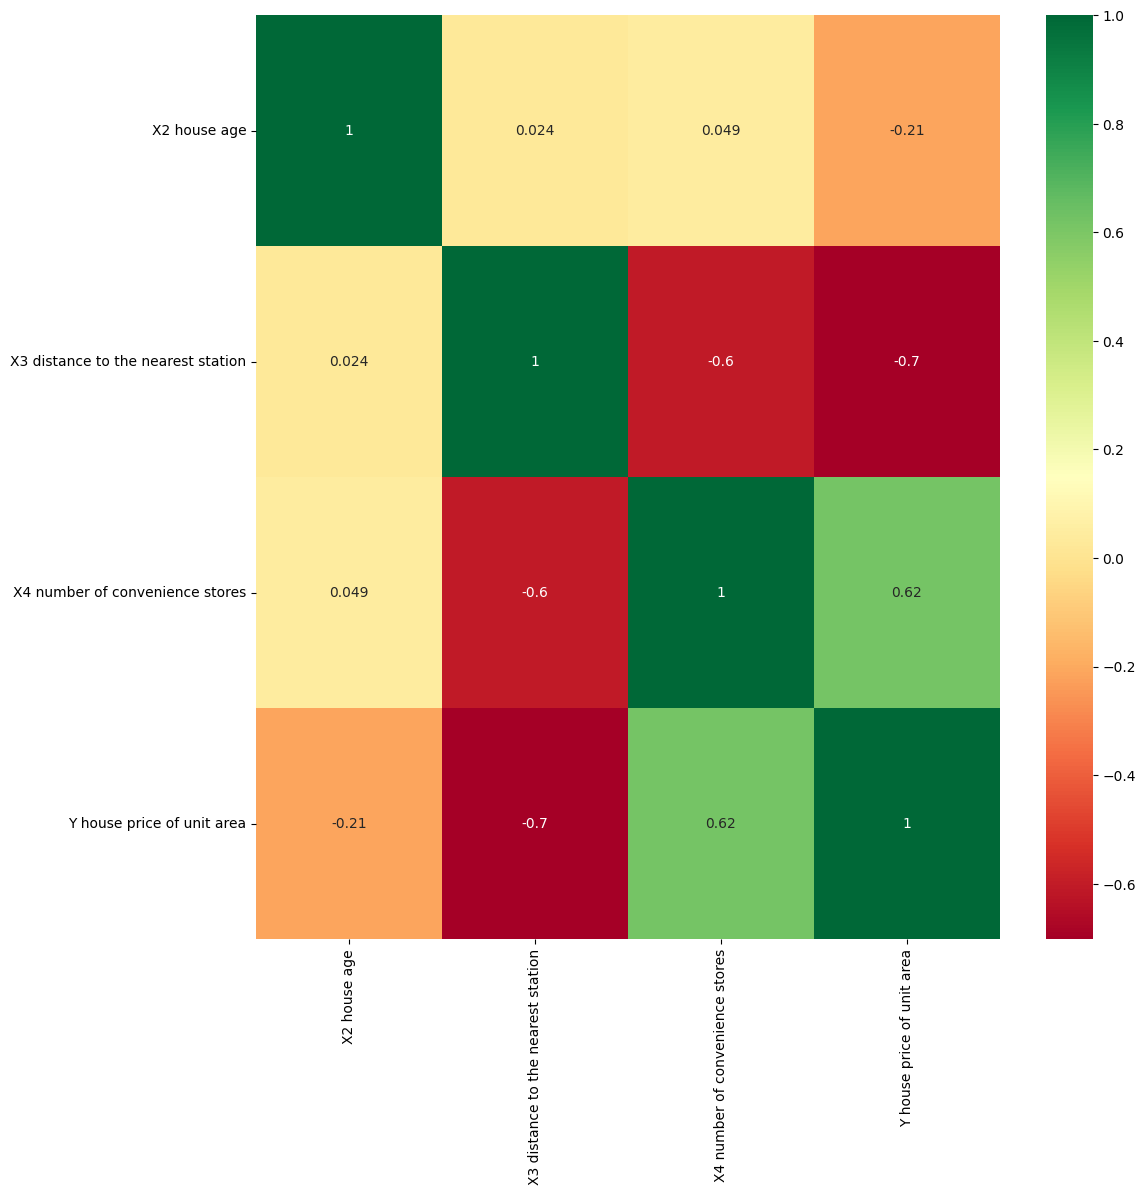

In [11]:
#Get visualization of Correlation of each feature in the dataset
corrmat= df.corr()
corr_features= corrmat.index
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

In [12]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [13]:
x= df[['X2 house age', 'X3 distance to the nearest station',
       'X4 number of convenience stores']]
y= df['Y house price of unit area']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 20, random_state= 5)

In [16]:
lm= LinearRegression()

In [17]:
lm.fit(x_train, y_train)

LinearRegression()

In [18]:
print(lm.coef_)

[-0.25040972 -0.00514182  1.49019957]


In [19]:
print(lm.intercept_)

41.64648452245436


In [20]:
predicted= lm.predict(x_test)

In [21]:
predicted

array([49.06394743, 16.70524239, 43.62831265, 34.09907117, 47.60898362,
       16.65891244, 47.55889738, 34.67304521, 43.62831265, 41.72775222,
        6.20422525, 33.93297502, 52.9905499 , 49.31685517, 46.22225719,
       32.16936347, 30.62207496, 34.62296327, 17.11892904, 46.95196086])

In [22]:
df2= pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df2.reset_index(inplace=True)
df2.drop(columns= 'index', axis=1, inplace= True)
df2

,Actual,Predicted
0,45.4,49.063947
1,12.9,16.705242
2,42.1,43.628313
3,31.7,34.099071
4,46.1,47.608984
5,19.2,16.658912
6,39.3,47.558897
7,40.6,34.673045
8,53.0,43.628313
9,52.2,41.727752


In [23]:
#Checking the accuracy of our model
lm.score(x, y)

0.6001668845439527

<AxesSubplot: title={'center': 'Actual vs Predicted Price'}>

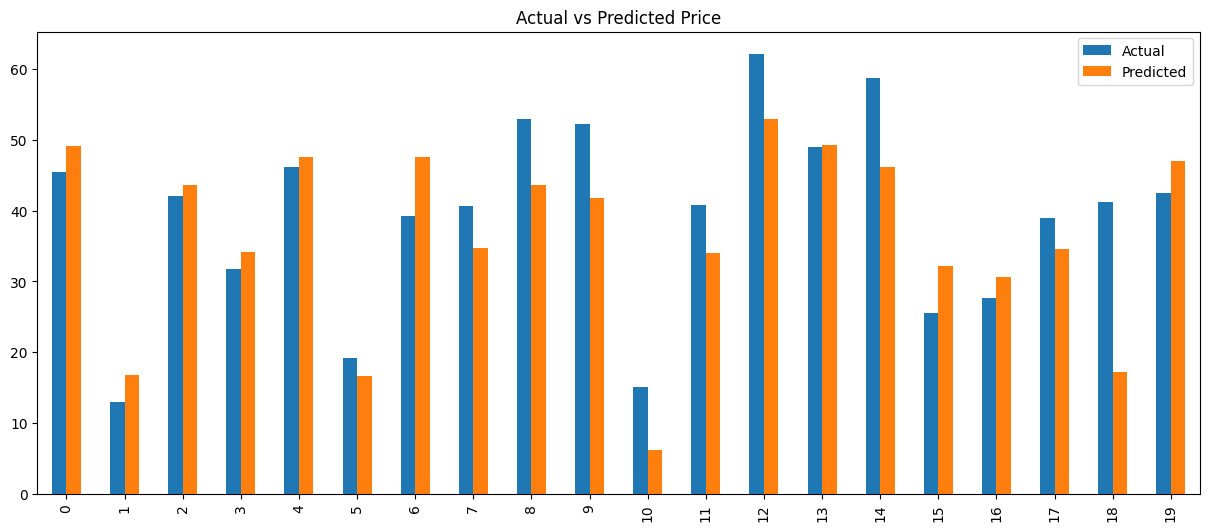

In [24]:
df2.plot(kind= 'bar', figsize=(15,6), title= 'Actual vs Predicted Price')